### YORUBA POS TAGGER MODEL TRAINING 

##### THE FOLLOWING STEPS WERE FOLLOWED

##### 1. IMPORT AND VIEW DATA

##### 2. DATA PREPROCESSING: ENCODING WITH TFID VECTORIZER FOR FEATURES AND LABEL BINARIZER FOR TARGET AND CHECK FOR MISSING DATA

##### 3. TRAINING : USING ARTIFICIAL NEURAL NETWORK

##### 4.  EVALUATE MODEL WITH CONFUSION MATRIX AND  PREDICTION

##### 5. SAVE MODEL WITH PICKLE







### 1. IMPORT AND  VIEW DATA

#### import libraries used

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle


In [3]:
#load in dataset
df=pd.read_excel('NewYorubaTag.xlsx')
#view dataset
df.head(10)

,words,tag
0,Ó,Prn
1,lọ,V
2,sí,PP
3,ilé-ẹ̀kọ́,N
4,Pọ́ọ̀lù,N
5,mímọ́,Adj
6,ní,PP
7,Ayétòrò,N
8,Lẹ́yìn,PP
9,tí,Det


In [4]:
# Get indexes where name column have value Num
indexNames = df[(df['tag'] == 'Num')|(df['tag'] == 'Int')].index # Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
# total amount of rows and columns
total_rows=len(df.axes[0])
print("total rows", total_rows)
total_cols=len(df.axes[1])
print("total columns", total_cols)

total rows 11575
total columns 2


### 2. DATA PREPROCESSING : ENCODING WITH TFID VECTORIZER FOR FEATURES AND LABEL BINARIZER FOR TARGET AND CHECK FOR MISSING DATA

#### check for missing data
#### false :means no missing data

In [5]:
df=df.dropna()
Missing_data= df.isnull().any().any()  
print(Missing_data)

False


#### then SPLIT DATA INTO 80% FOR TRAIN DATA AND 20 % FOR TEST DATA

In [6]:
#split data
data_count = pd.value_counts(df['tag'].values)
print("Number of labels in Entire Data")
print(data_count)
X_train, X_test, y_train, y_test = train_test_split(df['words'], df['tag'], test_size=0.2
                                                   )
X_train=X_train.astype(str)
X_test=X_test.astype(str)
y_train_count = y_train.value_counts()
y_test_count = y_test.value_counts()
print("Number of labels in y_test")
print(y_train_count)
print("Number of labels in y_train")
print(y_test_count)
print("Number of Training Sample: ",X_train.shape)
print("Number of Training label: ",y_train.shape)
print("Number of Test Sample: ",X_test.shape)
print("Number of Test label: ",y_test.shape)

Number of labels in Entire Data
N       3098
Prn     1933
V       1777
Det     1384
Adj     1115
PP      1113
Adv      797
Conj     356
dtype: int64
Number of labels in y_test
N       2495
Prn     1531
V       1407
Det     1098
PP       897
Adj      893
Adv      648
Conj     289
Name: tag, dtype: int64
Number of labels in y_train
N       603
Prn     402
V       370
Det     286
Adj     222
PP      216
Adv     149
Conj     67
Name: tag, dtype: int64
Number of Training Sample:  (9258,)
Number of Training label:  (9258,)
Number of Test Sample:  (2315,)
Number of Test label:  (2315,)


In [7]:
test_label_count = y_test

#### view some features we will encode with tfidvectorizer

In [8]:
X_train[:5]

2925        tí
11195     nkan
4649     pẹ̀lú
8876         ń
46          ni
Name: words, dtype: object

### using tfidvectorizer to encode Features of data

#### TfidfVectorizer - Transforms text to feature vectors that can be used as input to estimator. 

In [9]:
# IMPORT TfidfVectorizer()
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

#convert data to string and loop
corpus = [str (X_train) for item in X_train]

#apply the tfidvectorizer to training features: x_train
Xx = vectorizer.fit_transform((corpus))

#print(Xx.shape)

### using label binarizer for encoding targets of data

In [10]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
#number of classes we want to predict
yyy=lb.fit_transform(y_train.astype(str))

print ("the targets we want to predict are")
print (lb.classes_)

print ("the targets encoding are")
print (yyy)


the targets we want to predict are
['Adj' 'Adv' 'Conj' 'Det' 'N' 'PP' 'Prn' 'V']
the targets encoding are
[[0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


###  Model Implementation

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                     
                     ('clf', MLPClassifier(hidden_layer_sizes=100, activation='relu', solver='adam', alpha=0.0001, 
                                batch_size='auto', learning_rate='constant', learning_rate_init=0.001, 
                                max_iter=1000, shuffle=True,
                                random_state=8, early_stopping=False))])


#Xx=Xx.dropna()
y_train= y_train.dropna()

Xx= X_train

model = pipeline.fit(Xx, y_train)








print("accuracy of the ANN model on the test data set: " + str(model.score(Xx, y_train)))



accuracy of the ANN model on the test data set: 0.5263555843594729


In [12]:
model2 = pipeline.fit(X_test, y_test)
print("accuracy of the ANN model on the test data set: " + str(model2.score(X_test, y_test)))

accuracy of the ANN model on the test data set: 0.5935205183585314


### 4.  EVALUATE MODEL WITH CONFUSION MATRIX AND  PREDICTION

#### PREDICTION FOR THE FIRST 5 ROWS OF THE TEST DATASET

In [13]:
print(model.predict(X_test)[:5])

['Det' 'N' 'Adv' 'N' 'Prn']


In [14]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)

<Figure size 648x648 with 0 Axes>

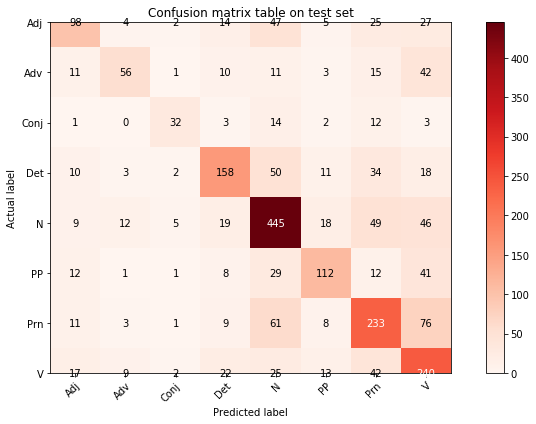

In [15]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Reds):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = list(unique_labels(y_true, y_pred))
    # print(cm)

    fig, ax = plt.subplots(figsize = (10,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Actual label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Plot non-normalized confusion matrix
plt.figure(figsize=(9,9))
class_label = ['Adj', 'Adv', 'Conj', 'Det', 'N','PP','Prn', 'V']
plot_confusion_matrix(y_test, predictions,classes = class_label,title='Confusion matrix table on test set')  
plt.show()


### CONFUSION MATRIX

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         Adj       0.58      0.44      0.50       222
         Adv       0.64      0.38      0.47       149
        Conj       0.70      0.48      0.57        67
         Det       0.65      0.55      0.60       286
           N       0.65      0.74      0.69       603
          PP       0.65      0.52      0.58       216
         Prn       0.55      0.58      0.57       402
           V       0.49      0.65      0.56       370

    accuracy                           0.59      2315
   macro avg       0.61      0.54      0.57      2315
weighted avg       0.60      0.59      0.59      2315



### 5. SAVE MODEL WITH PICKLE

### saving and using your trained model with pickle

In [17]:
#To save the model
import pickle
pickle_out = open("yoruba.pickle","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [18]:
# saving and using your trained model
import pickle
pickle_in = open("yoruba.pickle","rb")
model = pickle.load(pickle_in)

### Outcome of prediction after validation

In [19]:
splitted3 = "èdè"
splitted3=splitted3.split()
print (model.predict(splitted3))

['N']


In [20]:
splitted2 = "Kọ́lá naa Akínlàdé "
splitted2=splitted2.split()
print (model.predict(splitted2))


['N' 'PP' 'N']


In [21]:
splitted2 = "Akínlàdé n jeun "
splitted2=splitted2.split()
print (model.predict(splitted2))

['N' 'V' 'V']


In [22]:
splitted2 = "ọ̀kan nii won"
splitted2=splitted2.split()
print (model.predict(splitted2))

['Det' 'V' 'Prn']


In [23]:
splitted2 = "Akínlàdé n jeun"
splitted2=splitted2.split()
print (model.predict(splitted2))

['N' 'V' 'V']


In [27]:
splitted2 = "Kọ́lá n lo"
splitted2=splitted2.split()
print (model.predict(splitted2))

['N' 'V' 'V']


In [31]:
splitted2 = "ilẹ̀ Kọ́lá"
splitted2=splitted2.split()
print (model.predict(splitted2))

['N' 'N']
